<a href="https://colab.research.google.com/github/samp3209/MachineLearning/blob/main/MLFinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports


In [851]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from numpy import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.decomposition import PCA
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

In [852]:
df = pd.read_csv('property.csv')


# Data Fixing

In [853]:
#Shrinking the pnd column to have smallest amount of unique values
df['PrimaryNeighborhoodDescription'].unique()
pndlist = []
for i in df['PrimaryNeighborhoodDescription']:
  if i == 'south end':
    pndlist.append('SO.END')
  elif i == 'southern end':
    pndlist.append('south end')
  elif i == 'NEW NO END':
    pndlist.append('new north end')
  elif i == 'SO HILL SECT':
    pndlist.append('southern hill')
  elif i == 'DOWNTOWN':
    pndlist.append('downtown')
  elif i == 'UNIV HILL':
    pndlist.append('UVM hill area')
  elif i == 'OLD NO END':
    pndlist.append('old north end')
  else:
    pndlist.append(i)

df['PrimaryNeighborhoodDescription'] = pndlist
df['PrimaryNeighborhoodDescription'].unique()

array(['new north end', 'INTERVALE', 'old north end', 'NRTH AVE EXT',
       'NNE MIDRANGE', 'NNE WATERVIEW', 'NNE Small Complex',
       'NNE BASE COMPLEX', 'waterfront', 'Starr Farm Beach', '0',
       'WATERFRONT', 'lakeview tr', 'DWT SMALL COMPLEX', 'northern hill',
       'RIVERSIDE AV', 'NORTH ST', 'DWT WATERVIEW', 'DWT MIDRANGE',
       'DWT BASE COMPLEX', 'CBD', 'DOWNTN APTS', 'HILL APTS',
       'CHURCH ST MK', 'downtown', 'southern hill', 'UVM hill area',
       'UVM CAMPUS', 'SO.END', 'south end', 'DWT MID LEVEL',
       'SE SAMLL COMPLEX', 'SE MIDRANGE', 'INDUSTRIAL P', 'SHELBURNE ST',
       'DWT HIGH END', 'SE WATERFRONT', 'SE BASE COMPLEX', 'SE HIGN END',
       'DWT MED/HIGH END', 'RCO ZONE', 'EAST AVENUE'], dtype=object)

In [854]:
#Fixing LastSaleDate and StoryHeight Columns
#df.dtypes
df['YearBuilt'] = df['YearBuilt'].fillna(0).astype(int)
df['LastSaleDate'] = pd.to_datetime(df['LastSaleDate'])
df.dtypes
#df['StoryHeight'].unique()
story = []

for i in df['StoryHeight']:

  if i == 'Two Sty':
    story.append('2')
    
  elif i== 'One Sty':
    story.append('1')
    
  elif i == 'Three Sty':
    story.append('3')
    
  elif i == 'Four Sty':
    story.append('4')
    
  elif i == 'Five Sty':
    story.append('5')
    
  elif i == 'Six Sty':
    story.append('6')
    
  elif i == '9 Story':
    story.append('9')
  
  elif i == '4 story':
    story.append('4')
    
  elif i == '4 Story':
    story.append('4')
   
  elif i == '7 Story':
    story.append('7')
    
  elif i == '6 Story':
    story.append('6')
    
  elif i == '5 Stories':
    story.append('5')
   
  elif i == '8 Story':
    story.append('8')
    
  else:
      story.append(i)
df['StoryHeight'] = story
df['StoryHeight'] = df['StoryHeight'].astype(float)
df['StoryHeight']
#story

0        1.50
1         NaN
2        1.50
3        2.00
4        1.75
         ... 
11403    1.00
11404    1.00
11405    1.00
11406    4.00
11407    1.00
Name: StoryHeight, Length: 11408, dtype: float64

In [855]:
#fixing number columns to remove unneccessary characters
df['BuildingValue'] = df['BuildingValue'].astype(str)
df['BuildingValue'] = df['BuildingValue'].str.replace(',','')
df['BuildingValue'] = df['BuildingValue'].str.replace('$','')
df['BuildingValue'] = df['BuildingValue'].astype(float)
######
df['LandValue'] = df['LandValue'].astype(str)
df['LandValue'] = df['LandValue'].str.replace(',','')
df['LandValue'] = df['LandValue'].str.replace('$','')
df['LandValue'] = df['LandValue'].astype(float)
######

########
df['LastSaleAmount'] = df['LastSaleAmount'].astype(str)
df['LastSaleAmount'] = df['LastSaleAmount'].str.replace(',','')
df['LastSaleAmount'] = df['LastSaleAmount'].str.replace('$','')
df['LastSaleAmount'] = df['LastSaleAmount'].astype(float)
########
#square feet removal
########
df['LotSqFeet'] = df['LotSqFeet'].astype(str)
df['LotSqFeet'] = df['LotSqFeet'].str.replace(' sqft','')
df['LotSqFeet'] = df['LotSqFeet'].str.replace(',','')
df['LotSqFeet'] = df['LotSqFeet'].astype(int)
#########
df['BuildingGrossAreaSF'] = df['BuildingGrossAreaSF'].astype(str)
df['BuildingGrossAreaSF'] = df['BuildingGrossAreaSF'].str.replace(' sqft','')
df['BuildingGrossAreaSF'] = df['BuildingGrossAreaSF'].str.replace(',','')
df['BuildingGrossAreaSF'] = df['BuildingGrossAreaSF'].astype(int)
#########
#########
df['BuildingFinishedSf'] = df['BuildingFinishedSf'].astype(str)
df['BuildingFinishedSf'] = df['BuildingFinishedSf'].str.replace(' sqft','')
df['BuildingFinishedSf'] = df['BuildingFinishedSf'].str.replace(',','')
df['BuildingFinishedSf'] = df['BuildingFinishedSf'].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  app.launch_new_instance()


In [856]:
#Adding numeric scale to physical condition
#print(df['PhysicalCondition'].unique())
nums = []
for i in df['PhysicalCondition']:
  if i == 'Fair':
    nums.append(1)
  elif i == 'Fair-Avg':
    nums.append(2)
  elif i == 'Average':
    nums.append(3)
  elif i == 'Avg-Good':
    nums.append(4)
  elif i == 'Good':
    nums.append(5)
  elif i == 'Good-VG':
    nums.append(6)
  else:
    nums.append(7)
df['PhysicalCondition'] = nums
df['PhysicalCondition'] = df['PhysicalCondition'].astype(int)
df['PhysicalCondition'].sample(20)

2334     3
6484     4
6543     3
3053     7
10424    5
5206     3
2815     3
1449     3
8004     5
301      3
10014    5
6055     5
3101     3
8390     3
10389    3
10551    5
7386     3
8096     3
3284     3
2204     3
Name: PhysicalCondition, dtype: int64

In [857]:
quantitative = [f for f in df.columns if df.dtypes[f] != 'object']
quantitative

['PropertyId',
 'LastSaleDate',
 'LastSaleAmount',
 'LotSqFeet',
 'BuildingValue',
 'LandValue',
 'BuildingNo',
 'YearBuilt',
 'StoryHeight',
 'BuildingGrossAreaSF',
 'BuildingFinishedSf',
 'TotalRooms',
 'Bedrooms',
 'FullBaths',
 'HalfBaths',
 'ResidentialUnits',
 'CommercialUnits',
 'PhysicalCondition',
 'DepreciationPct']

In [858]:
#dropping columns 
#df = df.drop(columns=['TaxParcelId', 'VermontSPAN', 'StreetAddressFormatted', 'PrimaryLandUseCode', 'FoundationType', 'Quality'])


# Model Building

In [859]:
df_numerics_only = df.select_dtypes(include=np.number)
df_numerics_only = df_numerics_only.drop(columns=['BuildingValue'])

In [860]:
#df_numerics_only.isnull().sum(axis = 0)

In [861]:
#

df_numerics_only['StoryHeight'] = df_numerics_only['StoryHeight'].fillna(1)
df_numerics_only['ResidentialUnits'] =df_numerics_only['ResidentialUnits'].fillna(1)
df_numerics_only['CommercialUnits'] =df_numerics_only['CommercialUnits'].fillna(1)
#df_numerics_only['ResidentialUnits']

In [862]:
#df_numerics_only.mean()

In [863]:
#filling nans with the average
df_numerics_only['LastSaleAmount'] = df_numerics_only['LastSaleAmount'].fillna(454221)

In [864]:
scaled_features  = StandardScaler().fit_transform(df_numerics_only.values)
df_numerics_only = pd.DataFrame(scaled_features, index=df_numerics_only.index, columns=df_numerics_only.columns)

In [865]:
#building model inputs
Y = df['BuildingValue']
Y = Y.values.reshape(-1, 1)
Y = StandardScaler().fit_transform(Y)
X = df_numerics_only
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)
X_test=np.array(X_test)
Y_test=np.array(Y_test)
Y

array([[-0.00496577],
       [-0.07251107],
       [-0.06386065],
       ...,
       [-0.06969708],
       [-0.04710934],
       [-0.05032127]])

In [866]:
#df_numerics_only['LastSaleAmount']

In [867]:
#df['BuildingValue']

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SGDRegressor was fitted with feature names
  "X does not have valid feature names, but"


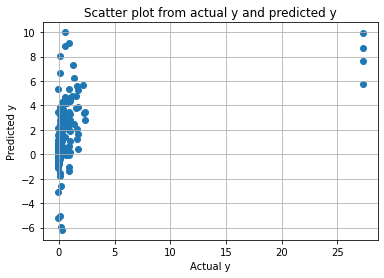

Mean Absolute percentage Error : 6.933193065261127
Mean Absolute Error : 0.21690767910778117
r2 score is : 0.1082708967605237
y is: [[-0.05766892]
 [-0.06062977]
 [-0.0597723 ]
 ...
 [-0.05780156]
 [-0.0559682 ]
 [-0.06119825]]
predicted was: [-0.13069341 -0.14626051 -0.14898094 ... -0.17932086 -0.00382617
 -0.21421914]
score is: 0.1082708967605237


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SGDRegressor was fitted with feature names
  "X does not have valid feature names, but"


In [868]:
#SGD Regressor
n_iter=1000
clf_ = SGDRegressor(max_iter=n_iter)
#clf = KNeighborsRegressor(n_neighbors=1)
#clf = LinearRegression()
clf_.fit(X_train, Y_train)

y_pred_sksgd=clf_.predict(X_test)
plt.scatter(Y_test,y_pred_sksgd)
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Scatter plot from actual y and predicted y')
plt.show()

print('Mean Absolute percentage Error :',mean_absolute_percentage_error(Y_test, y_pred_sksgd))
print('Mean Absolute Error :',mean_absolute_error(Y_test, y_pred_sksgd))
print('r2 score is :', r2_score(Y_test, y_pred_sksgd))
print('y is:', Y_test)
print('predicted was:', y_pred_sksgd)
print('score is:', clf_.score(X_test, Y_test))

model performance is very low going to look at the correlation matrix now

#Data Exploration

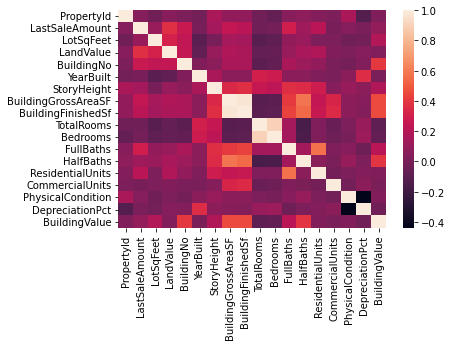

In [869]:
#correlation matrix
corrdata = df_numerics_only
corrdata['BuildingValue'] = df['BuildingValue']

corr = corrdata.corr()
sns.heatmap(corr)

The correlation matrix is kind of difficult to read without feature reduction because a lot of the features have little to no correlation to the target variable building value. A lot of variables are highly correlated to eachother but not with the target variable. It is no wonder the model performed so poorly

In [870]:
cor_target = abs(corr["BuildingValue"])
#Selecting the 5 dimensions to build the optimal model
relevant_features = cor_target[cor_target>0.33]
relevant_features
#buildingno, grossarea, finishedsf, half baths



BuildingNo             0.403770
BuildingGrossAreaSF    0.459051
BuildingFinishedSf     0.458151
HalfBaths              0.387801
BuildingValue          1.000000
Name: BuildingValue, dtype: float64

features chosen for the best correleation to the target variable
I'm assuming that buildingNo correlates with some kind of location which would give us a correlation to price. 

# Model with selected features

In [871]:
X = df_numerics_only[['BuildingNo', 'BuildingGrossAreaSF', 'HalfBaths', 'BuildingFinishedSf']]

In [872]:
#Building input and scaling the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
X_test=np.array(X_test)
Y_test=np.array(Y_test)
X_train=np.array(X_train)
Y_train = np.array(Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


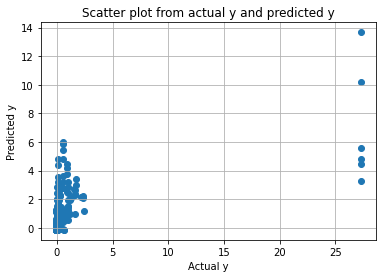

Mean Absolute percentage Error : 2.5713754827223836
Mean Absolute Error : 0.15513875196303634
r2 score is : 0.3480309075974799
y is: [[-0.05386482]
 [ 0.16214938]
 [-0.06195623]
 ...
 [ 0.03190037]
 [-0.05896222]
 [-0.06730471]]
predicted was: [-0.11151728  0.94066058 -0.03050196 ...  0.65553445 -0.12787375
 -0.14698063]
score is: 0.3480309075974799


In [873]:
#SGD Regressor
n_iter=1000
clf_ = SGDRegressor(max_iter=n_iter)
#clf = KNeighborsRegressor(n_neighbors=1)
#clf = LinearRegression()
clf_.fit(X_train, Y_train)

y_pred_sksgd=clf_.predict(X_test)
plt.scatter(Y_test,y_pred_sksgd)
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Scatter plot from actual y and predicted y')
plt.show()

print('Mean Absolute percentage Error :',mean_absolute_percentage_error(Y_test, y_pred_sksgd))
print('Mean Absolute Error :',mean_absolute_error(Y_test, y_pred_sksgd))
print('r2 score is :', r2_score(Y_test, y_pred_sksgd))
print('y is:', Y_test)
print('predicted was:', y_pred_sksgd)
print('score is:', clf_.score(X_test, Y_test))

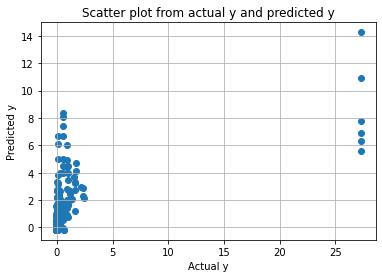

Mean Absolute percentage Error : 2.859983891841009
Mean Absolute Error : 0.17455280089115333
r2 score is : 0.36507715471122026
y is: [[-0.05386482]
 [ 0.16214938]
 [-0.06195623]
 ...
 [ 0.03190037]
 [-0.05896222]
 [-0.06730471]]
predicted was: [[-0.11290868]
 [ 0.95924918]
 [-0.06363216]
 ...
 [ 0.7649811 ]
 [-0.13840729]
 [-0.16882723]]
score is: 0.36507715471122026


In [874]:
#Kernel Ridge Regression 
from sklearn.kernel_ridge import KernelRidge
krr = KernelRidge(alpha=1.0)
krr.fit(X_train,Y_train)
y_pred_sksgd=krr.predict(X_test)
plt.scatter(Y_test,y_pred_sksgd)
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Scatter plot from actual y and predicted y')
plt.show()

print('Mean Absolute percentage Error :',mean_absolute_percentage_error(Y_test, y_pred_sksgd))
print('Mean Absolute Error :',mean_absolute_error(Y_test, y_pred_sksgd))
print('r2 score is :', r2_score(Y_test, y_pred_sksgd))
print('y is:', Y_test)
print('predicted was:', y_pred_sksgd)
print('score is:', krr.score(X_test, Y_test))

After dimensional reduction we see a greater model performance with SDG regressor. By reducing the dimensions we are eliminating potential correlations from different features that might mess with model performance. By selecting the highest correlated features it allows the model to predict with higher accuracy. 

In [875]:
X['BuildingValue'] = df['BuildingValue']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


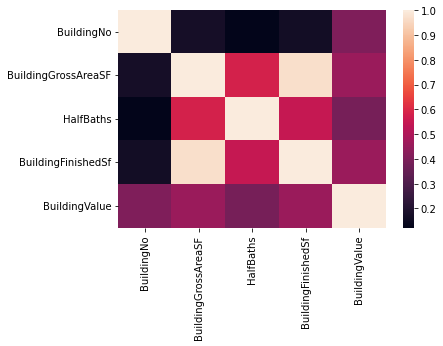

In [876]:
#correlation matrix of the selected dimensions. 
corr = X.corr()
sns.heatmap(corr)

In [877]:
corr['BuildingValue']

BuildingNo             0.403770
BuildingGrossAreaSF    0.459051
HalfBaths              0.387801
BuildingFinishedSf     0.458151
BuildingValue          1.000000
Name: BuildingValue, dtype: float64

The correlation matrix of the selected features shows us a much more clearer picture on what variables correlate. all of the variables are decently correlated with building value. Half baths and building finsished do have a very high correlation which is a potential cause for concern but due to the significant increase of the models performance I am not too worried about it. 